## Mijn Rotterdamse Eetwijzer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_excel("Restaurants_Data.xlsx")
display(df.head())
display(df.info())

,Date,Restaurant,Cuisine Type,Location,Avg.Spent,Taste,Environment,Service,Reviews Counts,Google Maps Rating,Personal Rating,Comments
0,2024-08-24,Greek Kitchen,Greeze,3062VL,15.75,3.9,3.0,4.0,255,4.6,3.74,NaN
1,2024-08-28,Very Italian Pizza,Italian,3011GA,18.95,4.1,4.0,3.6,3801,4.3,3.98,NaN
2,2024-09-08,Hinoki,Japanese,3011GH,18.80,4.3,3.3,4.0,1956,4.6,4.04,Unagi Tantan Men
3,2024-09-20,Old Town,Malaysian,3011GK,23.50,4.3,3.3,3.9,421,4.4,4.02,Chicken Bomboo Leaf
4,2024-10-11,Madame Saigon,Vietnamese,3011BG,27.40,4.5,4.3,4.0,399,4.8,4.36,Pho Bo Dac Biet


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                29 non-null     datetime64[ns]
 1   Restaurant          29 non-null     object        
 2   Cuisine Type        29 non-null     object        
 3   Location            29 non-null     object        
 4   Avg.Spent           29 non-null     float64       
 5   Taste               29 non-null     float64       
 6   Environment         29 non-null     float64       
 7   Service             29 non-null     float64       
 8   Reviews Counts      29 non-null     int64         
 9   Google Maps Rating  29 non-null     float64       
 10  Personal Rating     29 non-null     float64       
 11  Comments            18 non-null     object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 2.8+ KB


None

## First Bite: What My Food Data Looks Like

Before we dive into fancy metrics, let’s meet the data behind my meals.  

- **Average rating (Google):** 4.48  
- **Average rating (me):** 4.09 → apparently, turns out I’m the stricter critic at the table.  
- **Average spend:** €23.45 → mostly mid-range dinners, with a few “treat yourself” moments up to €47.50.

What the charts show:
- Both Google and I love good food — most ratings live between 4.0 and 4.5.  
- My distribution is slightly lower and tighter, meaning I’m consistent but picky.  
- Spending, on the other hand, is all over the place, a nice reminder that "joy isn’t perfectly correlated with euros spent."

So yes, I eat well, spend moderately, and review responsibly. 😋

,Google Maps Rating,Personal Rating,Avg.Spent
count,29.000000,29.000000,29.000000
mean,4.475862,4.088276,23.445862
std,0.261391,0.195267,7.750326
min,3.900000,3.740000,12.000000
25%,4.300000,3.980000,18.500000
50%,4.500000,4.080000,21.750000
75%,4.600000,4.240000,27.400000
max,4.900000,4.440000,47.500000


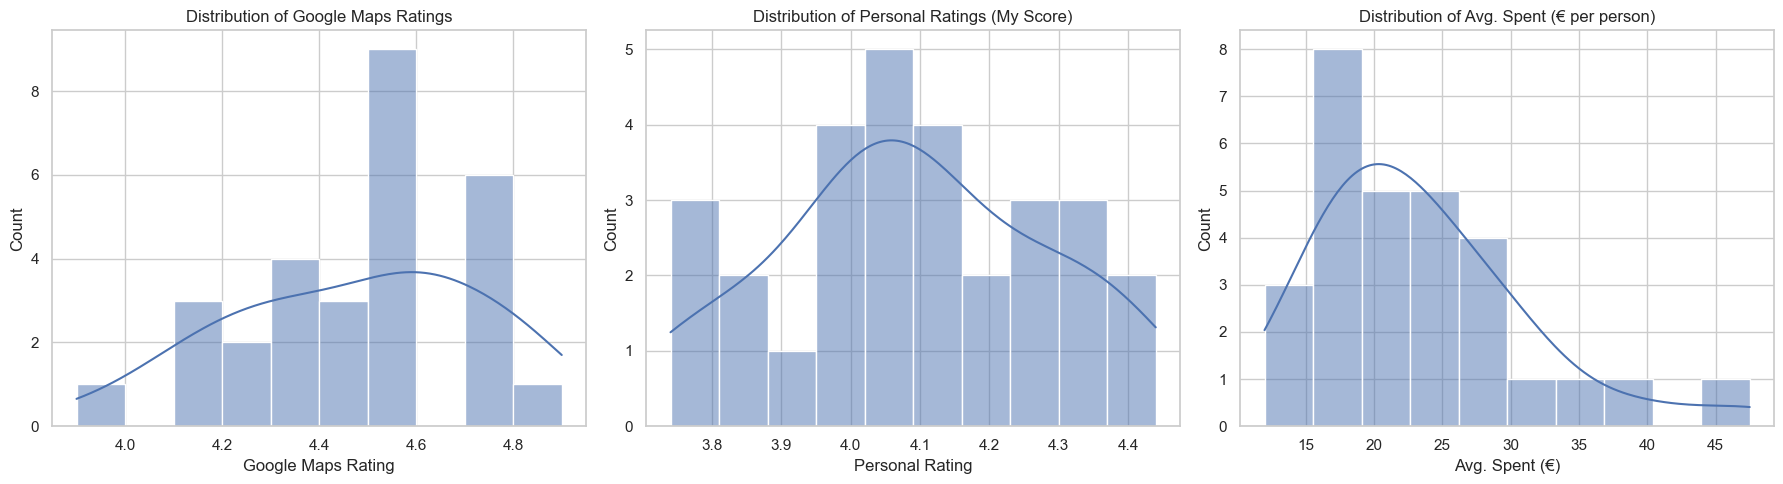

In [3]:
summary_stats = df[['Google Maps Rating', 'Personal Rating', 'Avg.Spent']].describe()
display(summary_stats)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Google Maps Rating distribution
sns.histplot(df['Google Maps Rating'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Google Maps Ratings')
axes[0].set_xlabel('Google Maps Rating')
axes[0].set_ylabel('Count')

# Personal Rating distribution
sns.histplot(df['Personal Rating'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Personal Ratings (My Score)')
axes[1].set_xlabel('Personal Rating')
axes[1].set_ylabel('Count')

# Average Spend distribution
sns.histplot(df['Avg.Spent'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Avg. Spent (€ per person)')
axes[2].set_xlabel('Avg. Spent (€)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation: Does Paying More Make Me Happier?

The correlation between what I spent and how much I liked it is 0.305, a small but positive relationship.  
In human terms: spending a bit more "can" make me slightly happier, but it is definitely not guaranteed.

If this chart were a person, it would whisper:
> " You might get better food when you pay more… but don’t count on it."

So while the pricier dinners sometimes spark joy, some of my most satisfying meals clearly came from the 20-25 range.  


Correlation (Avg.Spent vs Personal Rating): 0.305


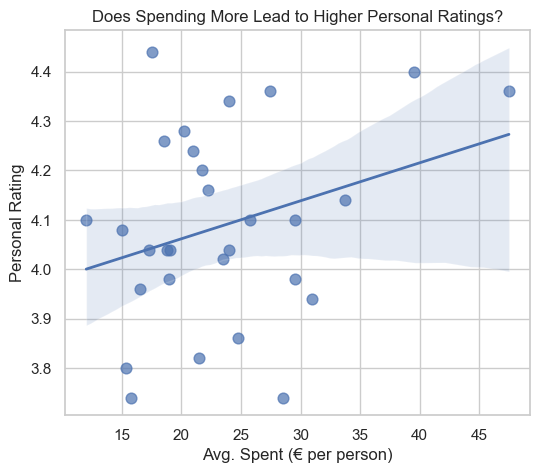

In [7]:
# Does Spending More Mean Higher Ratings?

corr_personal = df['Avg.Spent'].corr(df['Personal Rating'])
print("Correlation (Avg.Spent vs Personal Rating):", round(corr_personal, 3))

# Scatterplot: Spend vs Personal Rating
plt.figure(figsize=(6,5))
sns.regplot(
    data=df,
    x='Avg.Spent',
    y='Personal Rating',
    scatter_kws={'s':60, 'alpha':0.7},
    line_kws={'linewidth':2}
)
plt.title('Does Spending More Lead to Higher Personal Ratings?')
plt.xlabel('Avg. Spent (€ per person)')
plt.ylabel('Personal Rating')
plt.show()

## Best Value-for-Money Restaurants (aka “The Happiness-per-Euro League”)

Behold — the ultimate ranking of where my taste buds were happiest **per euro spent**.  
The **Value Index** combines my personal rating with how much I actually paid.  
Higher = better taste *and* better deal.

If this chart were a moral lesson, it’d say:
> “Good food doesn’t have to be expensive — it just has to hit the spot.”

,Restaurant,Cuisine Type,Location,Avg.Spent,Personal Rating,ValueIndex
19,Marioshawarma Restaurant,Syrian,3025GL,12.00,4.10,16.229167
25,Yellow River Lanzhou Handpulled Noodles Rotterdam,Chinese,3012JV,15.00,4.08,12.920000
17,Restaurant Baskent,Turkish,3073JP,17.50,4.44,12.051429
7,Kyoto Remen,Japanese,3063CC,15.30,3.80,11.797386
10,II Forno Italiano,Italian,3064AA,16.50,3.96,11.400000
0,Greek Kitchen,Greeze,3062VL,15.75,3.74,11.279365
27,Tokootje,Surinaamse,3053ER,17.25,4.04,11.124638
23,Little V,Vietnamese,3011GC,18.50,4.26,10.937838
2,Hinoki,Japanese,3011GH,18.80,4.04,10.207447
11,Hung Kee,Chinese,3012BM,19.00,4.04,10.100000


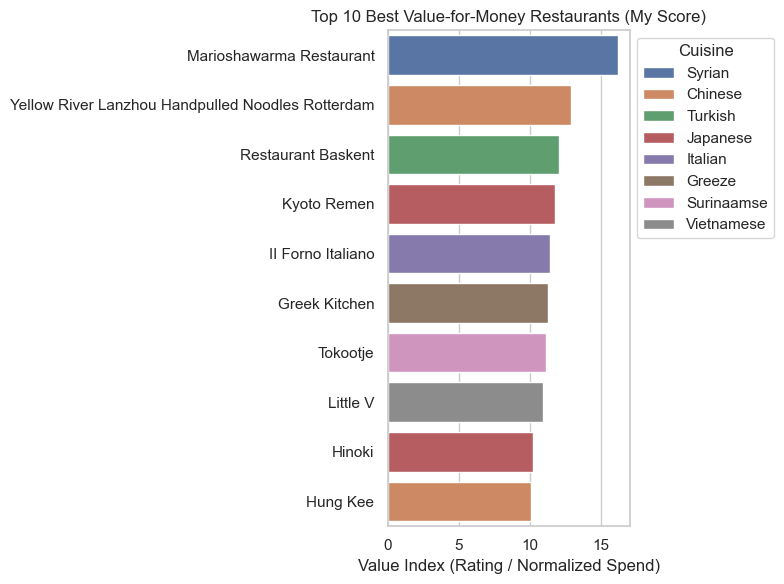

In [19]:
# Value Index (Rating per Euro Spent)

df['Spend_Normalized'] = df['Avg.Spent'] / df['Avg.Spent'].max()

# Value Index: higher = better value for money (high rating, low spend)
df['ValueIndex'] = df['Personal Rating'] / df['Spend_Normalized']

top_value = df.sort_values('ValueIndex', ascending=False).head(10)

display(top_value[['Restaurant', 'Cuisine Type', 'Location', 'Avg.Spent',
                   'Personal Rating', 'ValueIndex']])

plt.figure(figsize=(8,6))
sns.barplot(
    data=top_value,
    y='Restaurant',
    x='ValueIndex',
    hue='Cuisine Type',
    dodge=False
)
plt.title('Top 10 Best Value-for-Money Restaurants (My Score)')
plt.xlabel('Value Index (Rating / Normalized Spend)')
plt.ylabel('')
plt.legend(title='Cuisine', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


## Which Price Range Buys the Most Happiness?

Let's settle it once and for all: does paying more buy joy, or does Rotterdam’s cheap food quietly win?  
Quick verdict: expensive ≠ better.

- The €30+ spots earn "slightly" higher ratings (4.21), but their value index tanks — great food, overpriced joy.  
- The €20–30 range hits the sweet spot: solid taste, fair cost, happy wallet.  
- Under €20 wins the "best value crown".

So yes, data confirms it: Rotterdam’s real luxury is affordable comfort food. 

,PriceLevel,Avg_Spend,Avg_Personal_Rating,Avg_Google_Rating,Avg_ValueIndex,Count
0,20-30,24.545714,4.088571,4.371429,8.043702,14
1,above30,37.935000,4.210000,4.675000,5.379213,4
2,under20,16.777273,4.043636,4.536364,11.638502,11


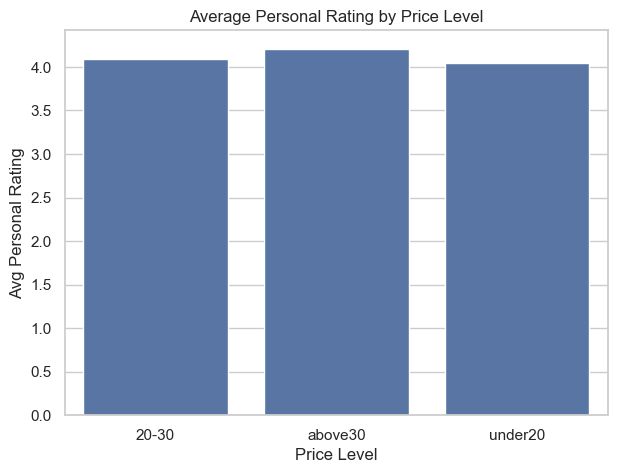

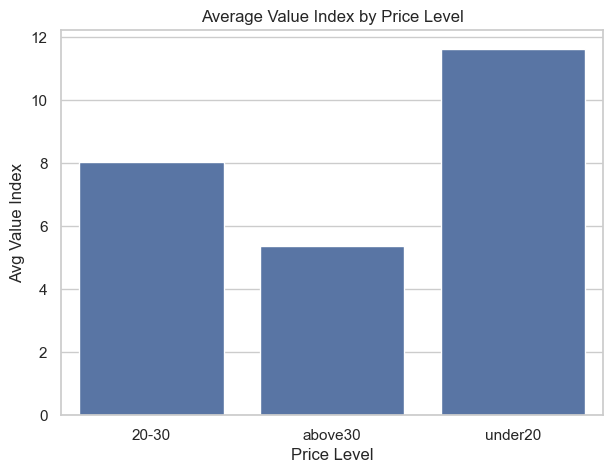

In [23]:
# Comparison by Price Level

def price_bucket(eur):
    if eur < 20:
        return 'under20'
    elif eur <= 30:
        return '20-30'
    else:
        return 'above30'
df['PriceLevel'] = df['Avg.Spent'].apply(price_bucket)

segment_stats = df.groupby('PriceLevel').agg(
    Avg_Spend=('Avg.Spent', 'mean'),
    Avg_Personal_Rating=('Personal Rating', 'mean'),
    Avg_Google_Rating=('Google Maps Rating', 'mean'),
    Avg_ValueIndex=('ValueIndex', 'mean'),
    Count=('Restaurant', 'count')
).reset_index()

display(segment_stats)

# price level vs rating
plt.figure(figsize=(7,5))
sns.barplot(
    data=segment_stats,
    x='PriceLevel',
    y='Avg_Personal_Rating'
)
plt.title('Average Personal Rating by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Avg Personal Rating')
plt.show()

# price level vs Value Index
plt.figure(figsize=(7,5))
sns.barplot(
    data=segment_stats,
    x='PriceLevel',
    y='Avg_ValueIndex'
)
plt.title('Average Value Index by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Avg Value Index')
plt.show()

In [13]:
!pip install geopy folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

df_map = df.copy()

geolocator = Nominatim(user_agent="mijn-rotterdamse-eetwijzer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Turn postcode into something geocodable
def to_query(postcode):
    return f"{postcode}, Rotterdam, Netherlands"
unique_postcodes = df_map['Location'].unique()
postcode_to_coords = {}

for pc in unique_postcodes:
    q = to_query(pc)
    location = geocode(q)
    if location:
        postcode_to_coords[pc] = (location.latitude, location.longitude)
    else:
        postcode_to_coords[pc] = (None, None)

df_map['Lat'] = df_map['Location'].map(lambda pc: postcode_to_coords[pc][0])
df_map['Lng'] = df_map['Location'].map(lambda pc: postcode_to_coords[pc][1])

display(df_map[['Restaurant', 'Location', 'Lat', 'Lng', 'Avg.Spent', 'Personal Rating']].head())
df_map.to_csv("Restaurants_With_Coordinates.csv", index=False)


Defaulting to user installation because normal site-packages is not writeable


,Restaurant,Location,Lat,Lng,Avg.Spent,Personal Rating
0,Greek Kitchen,3062VL,51.920674,4.511102,15.75,3.74
1,Very Italian Pizza,3011GA,51.919763,4.488266,18.95,3.98
2,Hinoki,3011GH,51.919504,4.484102,18.80,4.04
3,Old Town,3011GK,51.919219,4.482030,23.50,4.02
4,Madame Saigon,3011BG,51.916587,4.480316,27.40,4.36


## My Tasty Rotterdam Map

Behold — a literal map of my eating habits.    
Every dot = one meal I actually paid for.    

- **Bigger circle →** higher spend   
- **Greener color →** higher rating  
- **Click a dot →** see cuisine, spend, my score, and the recommendation.  

You can zoom in on clusters, plan your next dinner, good luck!

In [35]:
import folium

# Center the map roughly on Rotterdam city center.
center_lat = df_map['Lat'].mean()
center_lng = df_map['Lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=13)

# Color by rating 
def rating_color(r):
    if r >= 4.3:
        return "green"
    elif r >= 4.0:
        return "orange"
    else:
        return "red"

# scale marker radius by spend
max_spend = df_map['Avg.Spent'].max()

for _, row in df_map.iterrows():
    if pd.isna(row['Lat']) or pd.isna(row['Lng']):
        continue  

    spend = row['Avg.Spent']
    rating = row['Personal Rating']
    recommendation = row['Comments'] or 'No specific recommendations'

    popup_html = f"""
    <b>{row['Restaurant']}</b><br>
    Cuisine: {row['Cuisine Type']}<br>
    Avg Spent: €{spend:.2f} p.p.<br>
    My Rating: {rating:.2f} / 5<br>
    Google Rating: {row['Google Maps Rating']:.2f} / 5<br>
    Postcode: {row['Location']} / 5<br>
    My Recommendation: {recommendation}
    """

    folium.CircleMarker(
        location=[row['Lat'], row['Lng']],
        radius=5 + (spend / max_spend) * 10,  
        color=rating_color(rating),
        fill=True,
        fill_color=rating_color(rating),
        fill_opacity=0.7,
        weight=1,
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(m)

m


In [37]:
output_file = "Mijn_Rotterdamse_Eetwijzer_Map.html"
m.save(output_file)
print(f"Map saved to {output_file}")

Map saved to Mijn_Rotterdamse_Eetwijzer_Map.html
